<a href="https://colab.research.google.com/github/MKrezheska/NLP_Project-Style_Change_Detetion/blob/main/Models_BERT_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
import pandas as pd

In [46]:
import json
import numpy as np 
import time
import joblib

In [47]:
df_1 = pd.read_csv('drive/MyDrive/pan-2021/first-5000-bert-emb.csv')
df_2 = pd.read_csv('drive/MyDrive/pan-2021/train-5000-7300-bert.csv')
df_3 = pd.read_csv('drive/MyDrive/pan-2021/train-from-7300-bert.csv')

df = pd.concat([df_1, df_2, df_3])

In [48]:
df

,Unnamed: 0,file_name,emb,changes,label,authors,paragraph_authors
0,0,problem-10702,"[50.449974060058594, 2.697402238845825, 14.426...","[1, 1, 1, 0, 1]",1,2,"[1, 2, 1, 2, 2, 1]"
1,1,problem-10706,"[50.037479400634766, -24.617265701293945, 1.43...","[0, 1, 1, 1, 1, 1]",1,4,"[1, 1, 2, 3, 4, 3, 2]"
2,2,problem-10710,"[38.54051971435547, 14.400163650512695, 6.9886...","[1, 1, 0, 1, 0, 1]",1,4,"[1, 2, 3, 3, 4, 4, 3]"
3,3,problem-10712,"[71.1371078491211, -0.6726647019386292, 17.260...","[0, 0, 0, 0, 1, 1]",1,2,"[1, 1, 1, 1, 1, 2, 1]"
4,4,problem-10708,"[42.75421142578125, 3.8431107997894287, 3.0734...","[1, 0, 0, 0, 1]",1,3,"[1, 2, 2, 2, 2, 3]"
...,...,...,...,...,...,...,...
3895,3895,problem-207,"[55.4754524230957, -7.976742744445801, 3.05340...","[1, 0, 0]",1,2,"[1, 2, 2, 2]"
3896,3896,problem-211,"[70.7889404296875, 2.030505418777466, -0.37436...","[0, 0, 1, 0, 1, 0, 0]",1,3,"[1, 1, 1, 2, 2, 3, 3, 3]"
3897,3897,problem-208,"[65.77025604248047, 1.8704386949539185, -1.180...","[1, 1, 0, 0, 1]",1,2,"[1, 2, 1, 1, 1, 2]"
3898,3898,problem-217,"[54.963741302490234, 0.9973352551460266, 16.82...","[1, 1, 1]",1,3,"[1, 2, 3, 2]"


In [49]:
df = df.drop(["Unnamed: 0","file_name", "changes", "label", "paragraph_authors"], axis="columns")

In [50]:
df_valid = pd.read_csv('drive/MyDrive/pan-2021/validation_bert.csv')
df_valid.head()

,Unnamed: 0,file_name,emb,changes,multi_author,authors,paragraph_authors
0,0,problem-1899,"[49.12980651855469, -1.5622761249542236, 14.18...","[0, 1, 1, 1, 1, 1, 0, 1]",1,4,"[1, 1, 2, 3, 1, 4, 3, 3, 1]"
1,1,problem-1906,"[61.219879150390625, -5.509589195251465, 29.22...","[1, 0, 1]",1,3,"[1, 2, 2, 3]"
2,2,problem-1903,"[44.21048355102539, -6.232966423034668, 26.735...","[1, 1, 1, 1, 0, 0]",1,3,"[1, 2, 3, 1, 3, 3, 3]"
3,3,problem-1900,"[44.55337905883789, -5.841452598571777, 13.936...","[1, 1, 1, 1, 1]",1,4,"[1, 2, 1, 3, 4, 2]"
4,4,problem-1904,"[53.226463317871094, 6.5912981033325195, 16.66...","[0, 1, 1, 0, 1, 1, 1, 1]",1,4,"[1, 1, 2, 3, 3, 1, 2, 4, 1]"


In [51]:
df_valid = df_valid.drop(["Unnamed: 0","file_name", "changes", "multi_author", "paragraph_authors"], axis="columns")

In [52]:
df_train = df.iloc[:, : ]
df_test = df_valid.iloc[:, : ]
print(len(df_train))
print(len(df_test))

11200
2400


In [53]:
y_train = df_train['authors']
df_train.drop(['authors'], axis=1, inplace= True)
df_train.head(20)

,emb
0,"[50.449974060058594, 2.697402238845825, 14.426..."
1,"[50.037479400634766, -24.617265701293945, 1.43..."
2,"[38.54051971435547, 14.400163650512695, 6.9886..."
3,"[71.1371078491211, -0.6726647019386292, 17.260..."
4,"[42.75421142578125, 3.8431107997894287, 3.0734..."
5,"[55.965675354003906, -10.863653182983398, 21.1..."
6,"[57.53012466430664, 3.316451072692871, 24.9135..."
7,"[65.28244018554688, 8.659195899963379, 22.4455..."
8,"[55.271812438964844, -7.61473274230957, 11.138..."
9,"[54.49051284790039, -3.902076482772827, -1.088..."


In [54]:
y_test = df_test['authors']
df_test.drop(['authors'], axis=1, inplace= True)
df_test.head(20)

,emb
0,"[49.12980651855469, -1.5622761249542236, 14.18..."
1,"[61.219879150390625, -5.509589195251465, 29.22..."
2,"[44.21048355102539, -6.232966423034668, 26.735..."
3,"[44.55337905883789, -5.841452598571777, 13.936..."
4,"[53.226463317871094, 6.5912981033325195, 16.66..."
5,"[128.64418029785156, -9.34257984161377, 13.457..."
6,"[54.58216094970703, -9.10063648223877, 20.0652..."
7,"[51.603538513183594, -8.352190017700195, 15.29..."
8,"[41.43244934082031, 4.549075603485107, 8.16766..."
9,"[24.141916275024414, -0.02147524617612362, 11...."


In [55]:
xtrain = df_train.values.tolist()
X_test = df_test.values.tolist()

In [56]:
xtrain = [eval(xtrain[i][0]) for i in range(0, len(xtrain))]
X_test = [eval(X_test[i][0]) for i in range(0, len(X_test))]

In [57]:
xtrain = np.asarray(xtrain)

In [58]:
X_test = np.asarray(X_test)

In [59]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [60]:
def print_confusion_matrix(preds, labels, names):
  print(classification_report(labels, preds))

  # Mатрица на конфузија 
  names = names
  confusion = confusion_matrix(labels, preds)
  confusion = 100 * confusion.astype('float') / confusion.sum(axis=-1)[:, np.newaxis]
  df_1 = pd.DataFrame(data=confusion, columns=names, index=names)
  image = sns.heatmap(df_1, annot=True, fmt=".1f", vmin=0, vmax=100,cmap='Greens')
  image.set_title('Confusion matrix')
  image.set_ylabel('True label')
  image.set_xlabel('Predicted label')
  image.plot()

In [61]:
ytrain = y_train

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

dtc = DecisionTreeClassifier()
nbc = GaussianNB()
rfc = RandomForestClassifier()

dtc.fit(xtrain, ytrain)
nbc.fit(xtrain, ytrain)
rfc.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
test_tree_predict = dtc.predict(X_test)
test_naive_predict = nbc.predict(X_test)
test_random_forest_predict = rfc.predict(X_test)

              precision    recall  f1-score   support

           1       0.31      0.30      0.30       600
           2       0.25      0.26      0.26       600
           3       0.26      0.24      0.25       600
           4       0.31      0.32      0.31       600

    accuracy                           0.28      2400
   macro avg       0.28      0.28      0.28      2400
weighted avg       0.28      0.28      0.28      2400



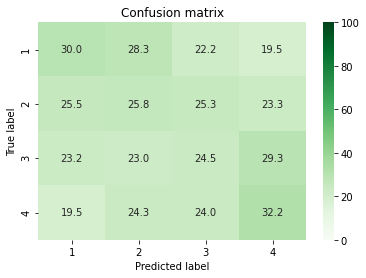

In [64]:
print_confusion_matrix(test_tree_predict,y_test,["1", "2", "3", "4"])

              precision    recall  f1-score   support

           1       0.43      0.36      0.39       600
           2       0.34      0.16      0.22       600
           3       0.33      0.10      0.15       600
           4       0.31      0.75      0.44       600

    accuracy                           0.34      2400
   macro avg       0.35      0.34      0.30      2400
weighted avg       0.35      0.34      0.30      2400



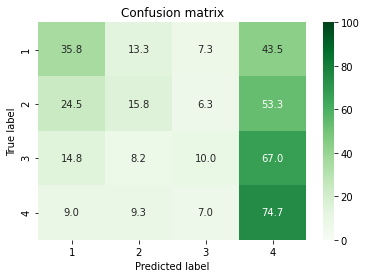

In [65]:
print_confusion_matrix(test_naive_predict, y_test, ["1", "2", "3", "4"])

              precision    recall  f1-score   support

           1       0.45      0.52      0.48       600
           2       0.32      0.29      0.30       600
           3       0.32      0.23      0.27       600
           4       0.42      0.50      0.46       600

    accuracy                           0.38      2400
   macro avg       0.37      0.39      0.38      2400
weighted avg       0.37      0.39      0.38      2400



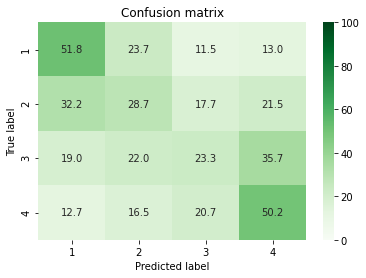

In [66]:
print_confusion_matrix(test_random_forest_predict,y_test, ["1", "2", "3", "4"])

In [67]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score


parameters_rf = {
          "criterion":['gini','entropy'],
          "max_depth": [3,5,None],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 5],
          "min_samples_split": [2, 5],
          'bootstrap': [False, True],
          'max_samples': [0.5, 1],
          'n_estimators': [2, 5, 100],
          "oob_score":[False, True],
           "random_state":[None,2]
         }


gs_rf = RandomizedSearchCV(rfc, parameters_rf, scoring='accuracy', n_jobs=3)
gs_rf.fit(xtrain, ytrain)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

Best score: 0.351
Best parameters set:
	 bootstrap: True
	 criterion: 'entropy'
	 max_depth: 3
	 max_features: None
	 max_samples: 0.5
	 min_samples_leaf: 1
	 min_samples_split: 2
	 n_estimators: 100
	 oob_score: True
	 random_state: 2
accuracy:  0.34708333333333335
              precision    recall  f1-score   support

           1       0.40      0.52      0.45       600
           2       0.30      0.10      0.15       600
           3       0.28      0.07      0.11       600
           4       0.33      0.70      0.45       600

    accuracy                           0.35      2400
   macro avg       0.33      0.35      0.29      2400
weighted avg       0.33      0.35      0.29      2400



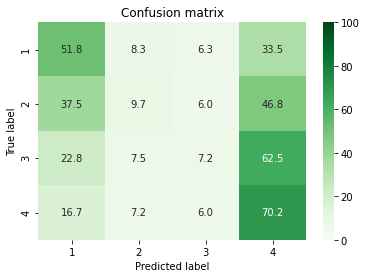

In [68]:
print("Best score: %0.3f" % gs_rf.best_score_) 
print("Best parameters set:" )
best_parameters_rf = gs_rf.best_estimator_.get_params()
for param_name_rf in sorted (parameters_rf . keys()): 
                    print("\t %s: %r" % (param_name_rf, best_parameters_rf[param_name_rf]))
        
y_pred = gs_rf.predict(X_test)

# print(classification_report(y_test, y_pred))
print("accuracy: ",accuracy_score(y_test, y_pred))
print_confusion_matrix( y_pred,y_test,["1", "2", "3", "4"])

In [69]:
X_train_norm = xtrain
X_test_norm = X_test

In [70]:
!pip install catboost

In [71]:
from catboost import Pool, cv, CatBoostClassifier, CatBoostRegressor

In [72]:
train_pool = Pool(data=xtrain,label = ytrain)

In [73]:
import sklearn.metrics as metrics

In [74]:
model_basic = CatBoostClassifier()
model_basic.fit(train_pool, plot=True,silent=True)
print(model_basic.get_best_score())

predicted_values = model_basic.predict(X_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

{'learn': {'MultiClass': 0.4492288842510256}}


              precision    recall  f1-score   support

           1       0.51      0.56      0.54       600
           2       0.36      0.32      0.34       600
           3       0.30      0.25      0.27       600
           4       0.42      0.51      0.46       600

    accuracy                           0.41      2400
   macro avg       0.40      0.41      0.40      2400
weighted avg       0.40      0.41      0.40      2400

Accuracy: 0.40875


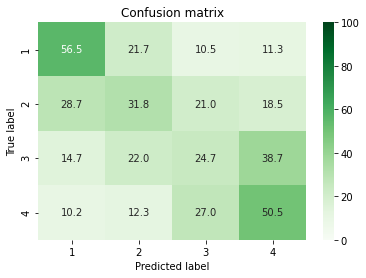

In [75]:
print_confusion_matrix(predicted_values, y_test, ["1", "2", "3", "4"])
print("Accuracy:", metrics.accuracy_score(y_test, predicted_values))

In [76]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier

Learning rate:  0.5
              precision    recall  f1-score   support

           1       0.48      0.48      0.48       600
           2       0.32      0.28      0.30       600
           3       0.28      0.29      0.29       600
           4       0.38      0.42      0.40       600

    accuracy                           0.37      2400
   macro avg       0.37      0.37      0.37      2400
weighted avg       0.37      0.37      0.37      2400



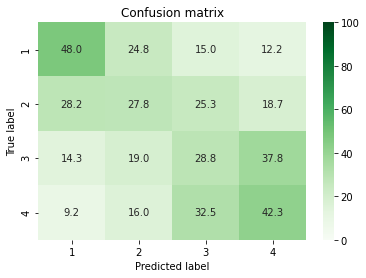

Learning rate:  0.75
              precision    recall  f1-score   support

           1       0.44      0.45      0.44       600
           2       0.27      0.26      0.27       600
           3       0.30      0.28      0.29       600
           4       0.41      0.43      0.42       600

    accuracy                           0.36      2400
   macro avg       0.35      0.35      0.35      2400
weighted avg       0.35      0.35      0.35      2400



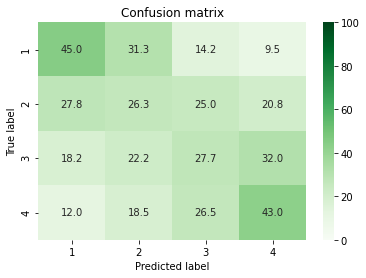

Learning rate:  1
              precision    recall  f1-score   support

           1       0.47      0.43      0.45       600
           2       0.31      0.30      0.30       600
           3       0.29      0.29      0.29       600
           4       0.39      0.43      0.41       600

    accuracy                           0.36      2400
   macro avg       0.37      0.36      0.36      2400
weighted avg       0.37      0.36      0.36      2400



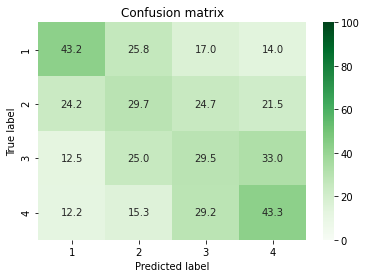

Learning rate:  1.1
              precision    recall  f1-score   support

           1       0.45      0.41      0.43       600
           2       0.30      0.28      0.29       600
           3       0.29      0.31      0.30       600
           4       0.36      0.38      0.37       600

    accuracy                           0.35      2400
   macro avg       0.35      0.35      0.35      2400
weighted avg       0.35      0.35      0.35      2400



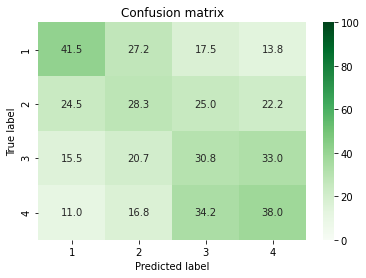

Learning rate:  1.2
              precision    recall  f1-score   support

           1       0.47      0.44      0.45       600
           2       0.32      0.31      0.32       600
           3       0.29      0.30      0.29       600
           4       0.38      0.41      0.39       600

    accuracy                           0.36      2400
   macro avg       0.37      0.36      0.36      2400
weighted avg       0.37      0.36      0.36      2400



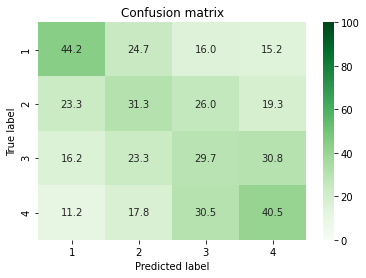

Learning rate:  1.3
              precision    recall  f1-score   support

           1       0.46      0.43      0.45       600
           2       0.27      0.26      0.26       600
           3       0.28      0.28      0.28       600
           4       0.36      0.38      0.37       600

    accuracy                           0.34      2400
   macro avg       0.34      0.34      0.34      2400
weighted avg       0.34      0.34      0.34      2400



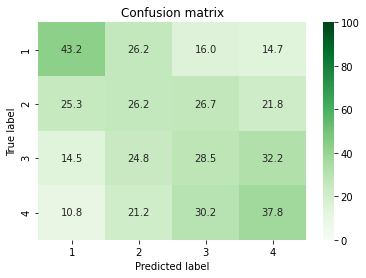

Learning rate:  1.4
              precision    recall  f1-score   support

           1       0.42      0.40      0.41       600
           2       0.28      0.29      0.29       600
           3       0.29      0.28      0.28       600
           4       0.36      0.38      0.37       600

    accuracy                           0.34      2400
   macro avg       0.34      0.34      0.34      2400
weighted avg       0.34      0.34      0.34      2400



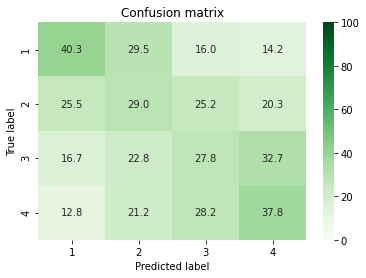

Learning rate:  1.5
              precision    recall  f1-score   support

           1       0.42      0.41      0.41       600
           2       0.28      0.28      0.28       600
           3       0.30      0.32      0.31       600
           4       0.38      0.38      0.38       600

    accuracy                           0.35      2400
   macro avg       0.35      0.35      0.35      2400
weighted avg       0.35      0.35      0.35      2400



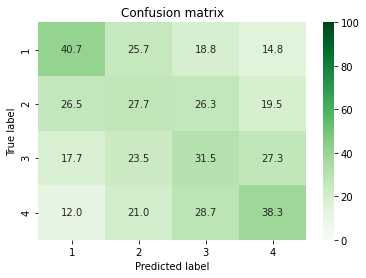

Learning rate:  2
              precision    recall  f1-score   support

           1       0.31      0.04      0.07       600
           2       0.23      0.34      0.28       600
           3       0.19      0.01      0.01       600
           4       0.26      0.62      0.37       600

    accuracy                           0.25      2400
   macro avg       0.25      0.25      0.18      2400
weighted avg       0.25      0.25      0.18      2400



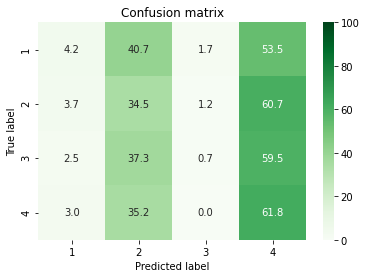

Learning rate:  3
              precision    recall  f1-score   support

           1       0.19      0.12      0.15       600
           2       0.27      0.40      0.32       600
           3       0.23      0.39      0.29       600
           4       0.44      0.08      0.14       600

    accuracy                           0.25      2400
   macro avg       0.28      0.25      0.23      2400
weighted avg       0.28      0.25      0.23      2400



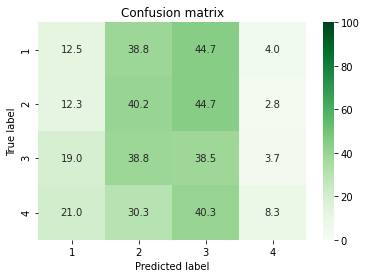

Learning rate:  4
              precision    recall  f1-score   support

           1       0.23      0.72      0.34       600
           2       0.31      0.05      0.08       600
           3       0.20      0.12      0.15       600
           4       0.00      0.00      0.00       600

    accuracy                           0.22      2400
   macro avg       0.18      0.22      0.15      2400
weighted avg       0.18      0.22      0.15      2400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


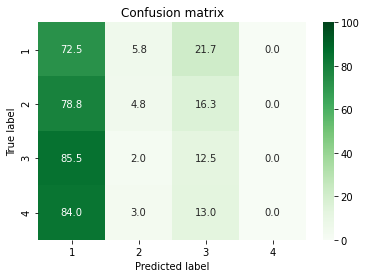

Learning rate:  5
              precision    recall  f1-score   support

           1       0.78      0.01      0.02       600
           2       0.30      0.09      0.14       600
           3       0.27      0.82      0.41       600
           4       0.13      0.08      0.10       600

    accuracy                           0.25      2400
   macro avg       0.37      0.25      0.17      2400
weighted avg       0.37      0.25      0.17      2400



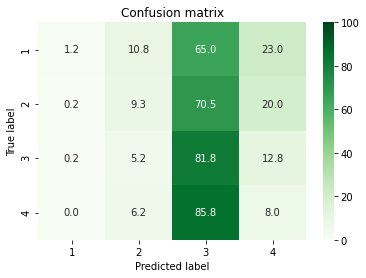

Learning rate:  6.3
              precision    recall  f1-score   support

           1       0.22      0.26      0.24       600
           2       0.26      0.65      0.37       600
           3       0.16      0.04      0.07       600
           4       0.30      0.01      0.01       600

    accuracy                           0.24      2400
   macro avg       0.23      0.24      0.17      2400
weighted avg       0.23      0.24      0.17      2400



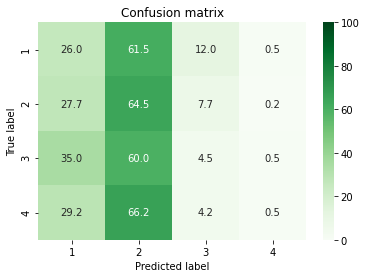

Learning rate:  7.7
              precision    recall  f1-score   support

           1       0.44      0.09      0.15       600
           2       0.26      0.01      0.02       600
           3       0.26      0.79      0.39       600
           4       0.23      0.16      0.19       600

    accuracy                           0.26      2400
   macro avg       0.30      0.26      0.19      2400
weighted avg       0.30      0.26      0.19      2400



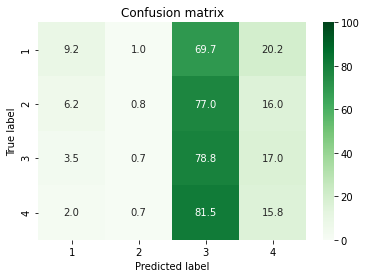

Learning rate:  10
              precision    recall  f1-score   support

           1       0.51      0.07      0.12       600
           2       0.29      0.03      0.05       600
           3       0.22      0.07      0.10       600
           4       0.27      0.92      0.41       600

    accuracy                           0.27      2400
   macro avg       0.32      0.27      0.17      2400
weighted avg       0.32      0.27      0.17      2400



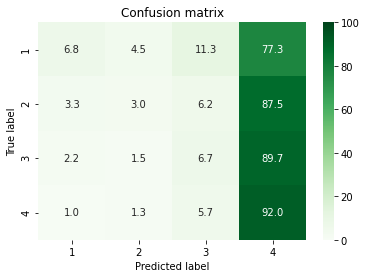

Learning rate:  20
              precision    recall  f1-score   support

           1       0.33      0.04      0.08       600
           2       0.26      0.27      0.27       600
           3       0.26      0.71      0.38       600
           4       0.11      0.01      0.02       600

    accuracy                           0.26      2400
   macro avg       0.24      0.26      0.18      2400
weighted avg       0.24      0.26      0.18      2400



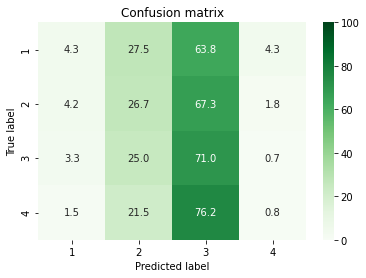

Learning rate:  30
              precision    recall  f1-score   support

           1       0.22      0.63      0.33       600
           2       0.28      0.19      0.22       600
           3       0.18      0.08      0.11       600
           4       0.21      0.01      0.03       600

    accuracy                           0.23      2400
   macro avg       0.22      0.23      0.17      2400
weighted avg       0.22      0.23      0.17      2400



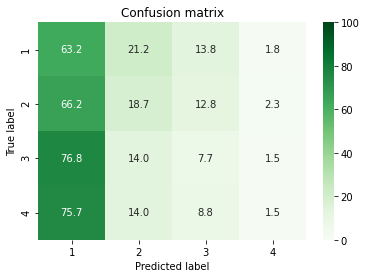

Learning rate:  45
              precision    recall  f1-score   support

           1       0.23      0.29      0.26       600
           2       0.26      0.51      0.35       600
           3       0.25      0.20      0.22       600
           4       0.25      0.00      0.00       600

    accuracy                           0.25      2400
   macro avg       0.25      0.25      0.21      2400
weighted avg       0.25      0.25      0.21      2400



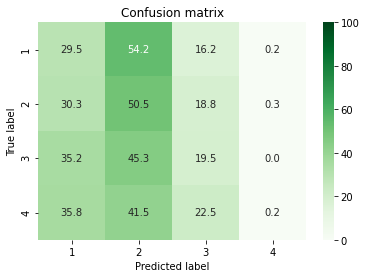

Learning rate:  55
              precision    recall  f1-score   support

           1       0.24      0.41      0.30       600
           2       0.24      0.39      0.30       600
           3       0.20      0.09      0.13       600
           4       0.18      0.04      0.07       600

    accuracy                           0.23      2400
   macro avg       0.22      0.23      0.20      2400
weighted avg       0.22      0.23      0.20      2400



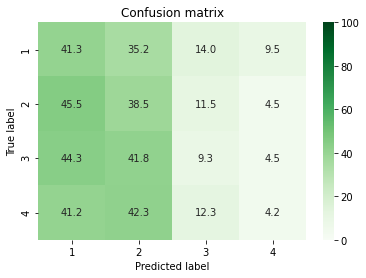

Learning rate:  62
              precision    recall  f1-score   support

           1       0.37      0.17      0.23       600
           2       0.26      0.25      0.25       600
           3       0.24      0.06      0.09       600
           4       0.28      0.66      0.39       600

    accuracy                           0.28      2400
   macro avg       0.29      0.28      0.24      2400
weighted avg       0.29      0.28      0.24      2400



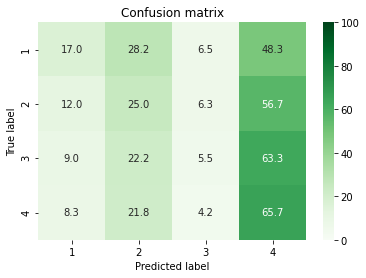

Learning rate:  77
              precision    recall  f1-score   support

           1       0.32      0.17      0.22       600
           2       0.24      0.17      0.20       600
           3       0.26      0.49      0.34       600
           4       0.23      0.20      0.22       600

    accuracy                           0.26      2400
   macro avg       0.26      0.26      0.24      2400
weighted avg       0.26      0.26      0.24      2400



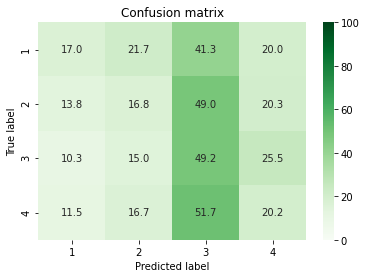

Learning rate:  84
              precision    recall  f1-score   support

           1       0.34      0.38      0.36       600
           2       0.25      0.27      0.26       600
           3       0.26      0.12      0.17       600
           4       0.26      0.35      0.30       600

    accuracy                           0.28      2400
   macro avg       0.28      0.28      0.27      2400
weighted avg       0.28      0.28      0.27      2400



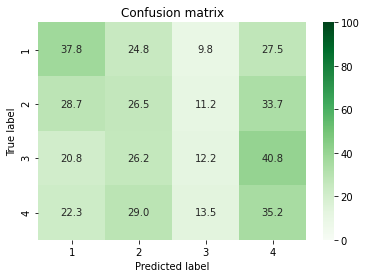

Learning rate:  90
              precision    recall  f1-score   support

           1       0.35      0.30      0.32       600
           2       0.28      0.16      0.20       600
           3       0.27      0.34      0.30       600
           4       0.26      0.33      0.29       600

    accuracy                           0.28      2400
   macro avg       0.29      0.28      0.28      2400
weighted avg       0.29      0.28      0.28      2400



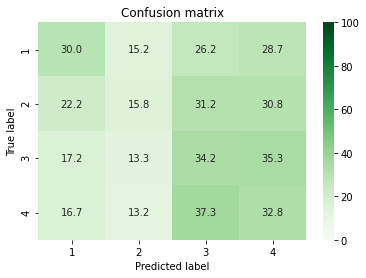

In [77]:
lr_list = [ 0.5, 0.75, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 2, 3, 4, 5, 6.3, 7.7, 10, 20, 30, 45, 55, 62, 77, 84, 90]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_features=4, max_depth=4, random_state=0)
    gb_clf.fit(xtrain, ytrain)
    predicted_values = gb_clf.predict(X_test)

    print("Learning rate: ", learning_rate)
    print_confusion_matrix(predicted_values, y_test, ["1", "2", "3", "4"])
    plt.show()

In [78]:
from sklearn.model_selection import train_test_split
import scipy.stats as st

In [79]:
X_val, X_test_1, y_val, y_test_1 = train_test_split(X_test, y_test, test_size=0.7, random_state=42)

In [80]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier((20, ), max_iter=100000).fit(xtrain, ytrain)

In [81]:
predicted_values = clf.predict(X_test)

              precision    recall  f1-score   support

           1       0.58      0.37      0.45       600
           2       0.27      0.73      0.39       600
           3       0.27      0.05      0.09       600
           4       0.37      0.16      0.23       600

    accuracy                           0.33      2400
   macro avg       0.37      0.33      0.29      2400
weighted avg       0.37      0.33      0.29      2400

Accuracy: 0.3279166666666667


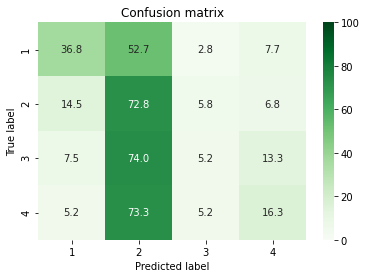

In [82]:
print_confusion_matrix(predicted_values, y_test, ["1", "2", "3", "4"])
print("Accuracy:", metrics.accuracy_score(y_test, predicted_values))

              precision    recall  f1-score   support

           1       0.50      0.55      0.52       600
           2       0.35      0.28      0.31       600
           3       0.30      0.20      0.24       600
           4       0.37      0.54      0.44       600

    accuracy                           0.39      2400
   macro avg       0.38      0.39      0.38      2400
weighted avg       0.38      0.39      0.38      2400

Accuracy: 0.39125


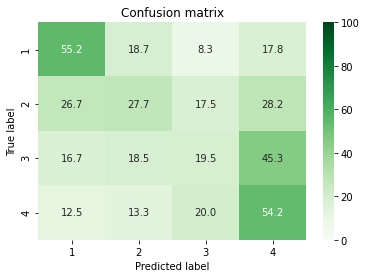

In [83]:
clf = MLPClassifier((20, 20, ), max_iter=100000).fit(xtrain, ytrain)
predicted_values = clf.predict(X_test)
print_confusion_matrix(predicted_values, y_test,["1", "2", "3", "4"])
print("Accuracy:", metrics.accuracy_score(y_test, predicted_values))

              precision    recall  f1-score   support

           1       0.53      0.54      0.53       600
           2       0.33      0.23      0.27       600
           3       0.31      0.41      0.35       600
           4       0.42      0.42      0.42       600

    accuracy                           0.40      2400
   macro avg       0.40      0.40      0.39      2400
weighted avg       0.40      0.40      0.39      2400

Accuracy: 0.39625


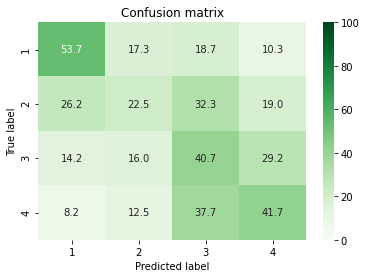

In [84]:
clf = MLPClassifier((1000, ), max_iter=100000).fit(xtrain, ytrain)
predicted_values = clf.predict(X_test)
print_confusion_matrix(predicted_values, y_test,["1", "2", "3", "4"])
print("Accuracy:", metrics.accuracy_score(y_test, predicted_values))

              precision    recall  f1-score   support

           1       0.51      0.54      0.52       600
           2       0.33      0.33      0.33       600
           3       0.31      0.26      0.28       600
           4       0.41      0.44      0.42       600

    accuracy                           0.39      2400
   macro avg       0.39      0.39      0.39      2400
weighted avg       0.39      0.39      0.39      2400

Accuracy: 0.39458333333333334


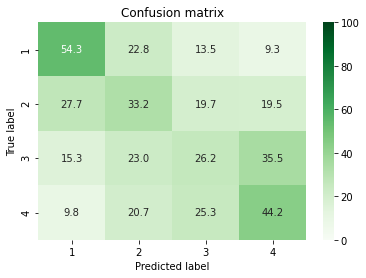

In [85]:
clf = MLPClassifier((256, 64, 128, ), max_iter=100000, learning_rate="invscaling").fit(xtrain, ytrain)
predicted_values = clf.predict(X_test)
print_confusion_matrix(predicted_values, y_test, ["1", "2", "3", "4"])
print("Accuracy:", metrics.accuracy_score(y_test, predicted_values))